I tried to do blind regression. 
initially tried linear regression (which gave accuracy of 1.23e-7 🥲)
polynomial regression made me stop when i checked mse which was 50.. something e something.
planned on doing EDA, but i am not so good in data manipulation.

edit: As the submission got extended, i now, went and tried for y against x for every y. wait, you will see what i did in this file. i don't know how to explain here. you people can see what i illegibly did in coming cells.

sorry for i erased earlier tryout code. don't know why. but, felt shy to share that code with microscopic accuracy.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train_data.csv")

In [3]:
df.head()

,w,x,y
0,-2.5,-2.784390,0.596025
1,-2.5,-2.308732,-0.449801
2,-2.5,-3.869936,-0.301154
3,-2.5,-2.671678,0.399640
4,-2.5,6.609344,0.700448


In [4]:
df2= pd.read_csv("test_data.csv")

In [5]:
# trying to describe the statistics of the data altogether
df.describe()


,w,x,y
count,1.000000e+08,1.000000e+08,1.000000e+08
mean,0.000000e+00,4.791858e-04,1.496772e-04
std,1.658312e+00,5.773173e+00,7.109031e-01
min,-2.500000e+00,-1.000000e+01,-1.249830e+00
25%,-1.500000e+00,-4.998248e+00,-7.086739e-01
50%,0.000000e+00,4.332894e-04,3.197931e-04
75%,1.500000e+00,4.999903e+00,7.089603e-01
max,2.500000e+00,1.000000e+01,1.259282e+00


In [6]:
#here, one thing i noticed was maximum was around 1.2 and minimum was also around - 1.2
#mean tending to 0
df[df['w'].between(1, 1.5)].describe()

,w,x,y
count,20000000.00,2.000000e+07,2.000000e+07
mean,1.25,1.932018e-03,3.217461e-04
std,0.25,5.773224e+00,7.066617e-01
min,1.00,-9.999999e+00,-1.234537e+00
25%,1.00,-4.994879e+00,-7.021526e-01
50%,1.25,3.493993e-03,7.399303e-04
75%,1.50,5.001802e+00,7.027593e-01
max,1.50,9.999999e+00,1.224020e+00


In [7]:
df.head(20)

,w,x,y
0,-2.5,-2.784390,0.596025
1,-2.5,-2.308732,-0.449801
2,-2.5,-3.869936,-0.301154
3,-2.5,-2.671678,0.399640
4,-2.5,6.609344,0.700448
5,-2.5,3.454268,-0.772394
6,-2.5,0.935185,-0.689399
7,-2.5,4.101455,0.791680
8,-2.5,-6.669111,-0.784889
9,-2.5,7.822688,-0.656696


In [8]:
df['w'].value_counts()

w
-2.5    10000000
-2.0    10000000
-1.5    10000000
-1.0    10000000
-0.5    10000000
 0.5    10000000
 1.0    10000000
 1.5    10000000
 2.0    10000000
 2.5    10000000
Name: count, dtype: int64

based on observing the value of w was discrete


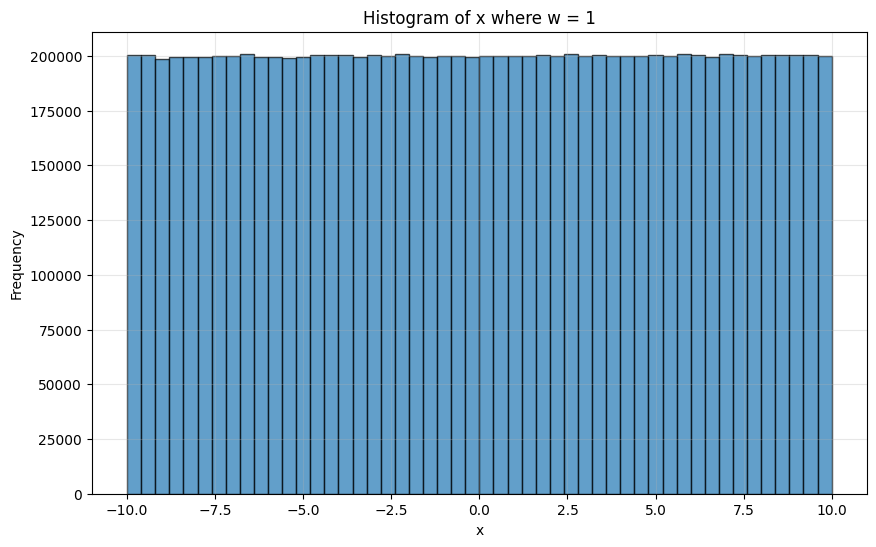

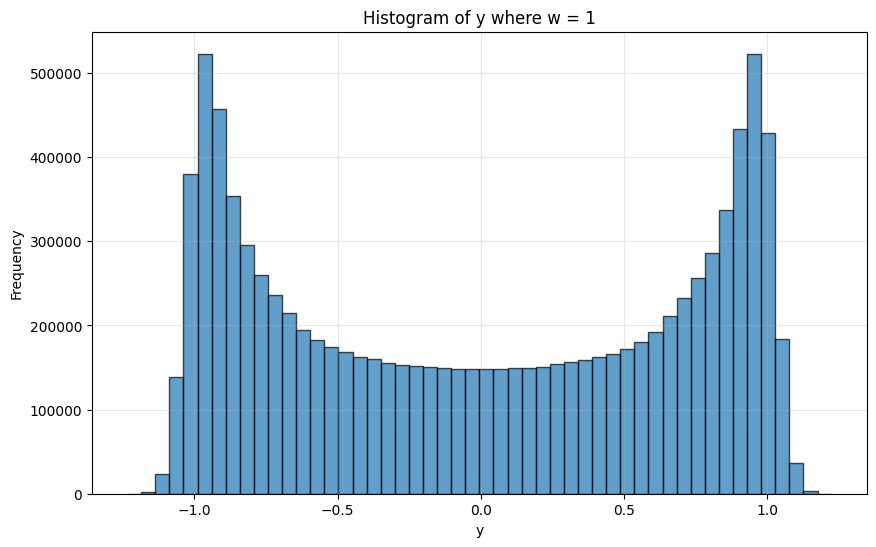

In [9]:
import matplotlib.pyplot as plt

# Filter data where w = 1
df_w1 = df[df['w'] == 1.5]

# Draw histogram for column 'x'
plt.figure(figsize=(10, 6))
plt.hist(df_w1['x'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of x where w = 1')
plt.grid(True, alpha=0.3)
plt.show()

# Or for column 'y'
plt.figure(figsize=(10, 6))
plt.hist(df_w1['y'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of y where w = 1')
plt.grid(True, alpha=0.3)
plt.show()

Leaving realizing that last minute try doesn't work...

Edit: resuming after extension,

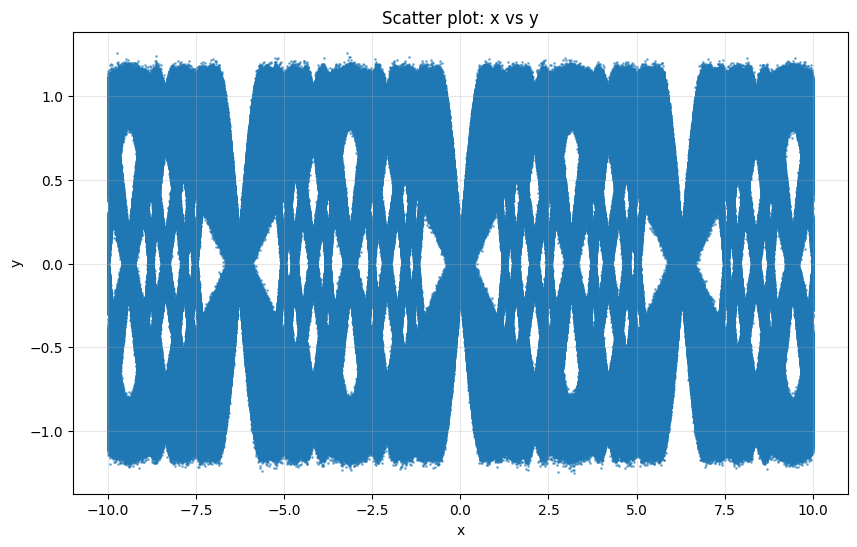

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], alpha=0.5, s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot: x vs y')
plt.grid(True, alpha=0.3)
plt.show()

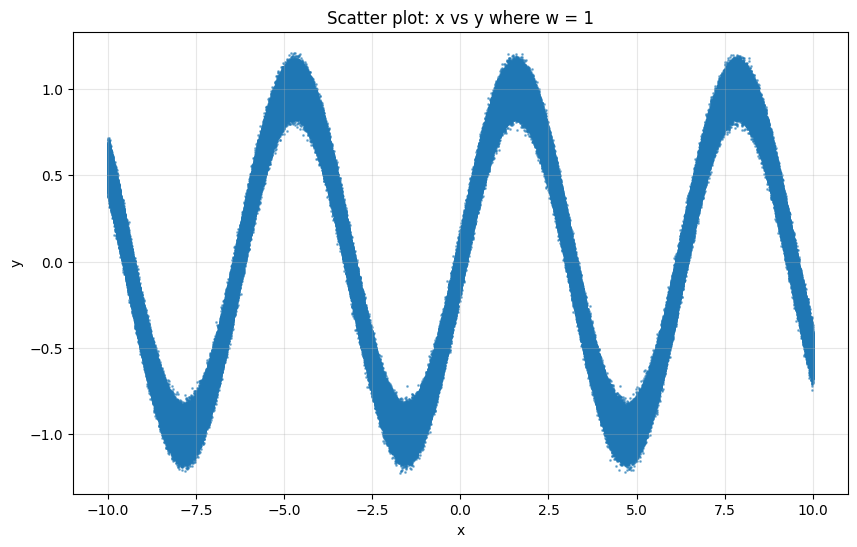

In [13]:
import matplotlib.pyplot as plt

df_w1 = df[df['w'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(df_w1['x'], df_w1['y'], alpha=0.5, s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot: x vs y where w = 1')
plt.grid(True, alpha=0.3)
plt.show()

In [47]:
df_w1[df_w1['y'].between(-0.1, 0.1)][df_w1['x'].between(2, 5)].head()

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/3589374621.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w1[df_w1['y'].between(-0.1, 0.1)][df_w1['x'].between(2, 5)].head()


,w,x,y
60000056,1.0,3.219678,-0.009496
60000093,1.0,3.210130,-0.092566
60000241,1.0,2.993373,0.042511
60000244,1.0,3.253044,-0.069722
60000336,1.0,3.217077,-0.045901


In [52]:
df_w1[df_w1['y'].between(-0.1, 0.1)][df_w1['x'].between(2.9, 3.2)].mean()['x']

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/1917723340.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w1[df_w1['y'].between(-0.1, 0.1)][df_w1['x'].between(2.9, 3.2)].mean()['x']


np.float64(3.1104570059798675)

In [53]:
df_w1[df_w1['y'].between(-0.1, 0.1)][df_w1['x'].between(5, 7.5)].head()

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/1818240004.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w1[df_w1['y'].between(-0.1, 0.1)][df_w1['x'].between(5, 7.5)].head()


,w,x,y
60000108,1.0,6.308538,0.099976
60000259,1.0,6.250164,-0.043560
60000455,1.0,6.254511,-0.031758
60000593,1.0,6.318932,0.055241
60000603,1.0,6.210100,-0.004772


In [54]:
df_w1[df_w1['y'].between(-0.1, 0.1)][df_w1['x'].between(6.2, 6.4)].mean()['x']

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/409446414.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w1[df_w1['y'].between(-0.1, 0.1)][df_w1['x'].between(6.2, 6.4)].mean()['x']


np.float64(6.293466810249204)

In [55]:
6.293466810249204 - 3.1104570059798675

3.1830098042693367

approxly pi

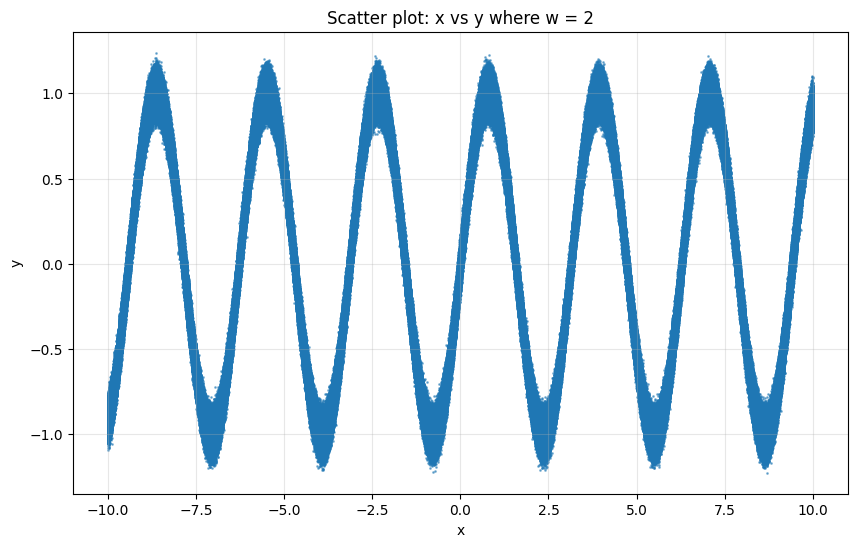

In [56]:
import matplotlib.pyplot as plt

df_w2 = df[df['w'] == 2]

plt.figure(figsize=(10, 6))
plt.scatter(df_w2['x'], df_w2['y'], alpha=0.5, s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot: x vs y where w = 2')
plt.grid(True, alpha=0.3)
plt.show()

In [59]:
df_w2[df_w2['y'].between(-0.1, 0.1)][df_w2['x'].between(0.5, 2.5)].head(20)

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/2638536570.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w2[df_w2['y'].between(-0.1, 0.1)][df_w2['x'].between(0.5, 2.5)].head(20)


,w,x,y
80000085,2.0,1.521577,0.040283
80000154,2.0,1.621435,-0.037340
80000270,2.0,1.549337,-0.004364
80000807,2.0,1.548486,0.071730
80000911,2.0,1.539083,0.072990
80000935,2.0,1.598620,0.014624
80001231,2.0,1.601921,0.029474
80001265,2.0,1.525763,0.051444
80001391,2.0,1.587845,-0.065257
80001446,2.0,1.595337,-0.059652


In [60]:
df_w2[df_w2['y'].between(-0.1, 0.1)][df_w2['x'].between(1.5, 1.7)].mean()['x']

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/2501500265.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w2[df_w2['y'].between(-0.1, 0.1)][df_w2['x'].between(1.5, 1.7)].mean()['x']


np.float64(1.5730950306381388)

In [62]:
df_w2[df_w2['y'].between(-0.1, 0.1)][df_w2['x'].between(2.5, 4)].head(20)

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/1769630276.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w2[df_w2['y'].between(-0.1, 0.1)][df_w2['x'].between(2.5, 4)].head(20)


,w,x,y
80000082,2.0,3.104349,-0.069134
80000769,2.0,3.152817,0.090612
80000996,2.0,3.179150,0.019365
80001337,2.0,3.183802,0.081360
80001392,2.0,3.138272,-0.057852
80001407,2.0,3.095925,-0.034242
80001585,2.0,3.211105,0.086901
80001703,2.0,3.177385,0.091119
80002017,2.0,3.128523,-0.045008
80002124,2.0,3.150240,-0.097744


In [63]:
df_w2[df_w2['y'].between(-0.1, 0.1)][df_w2['x'].between(3.09, 3.25)].mean()['x']

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/2684666618.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w2[df_w2['y'].between(-0.1, 0.1)][df_w2['x'].between(3.09, 3.25)].mean()['x']


np.float64(3.1483732015338193)

In [64]:
3.1483732015338193 - 1.5730950306381388

1.5752781708956805

approxly pi/2 means ***y = sin( w * x)***

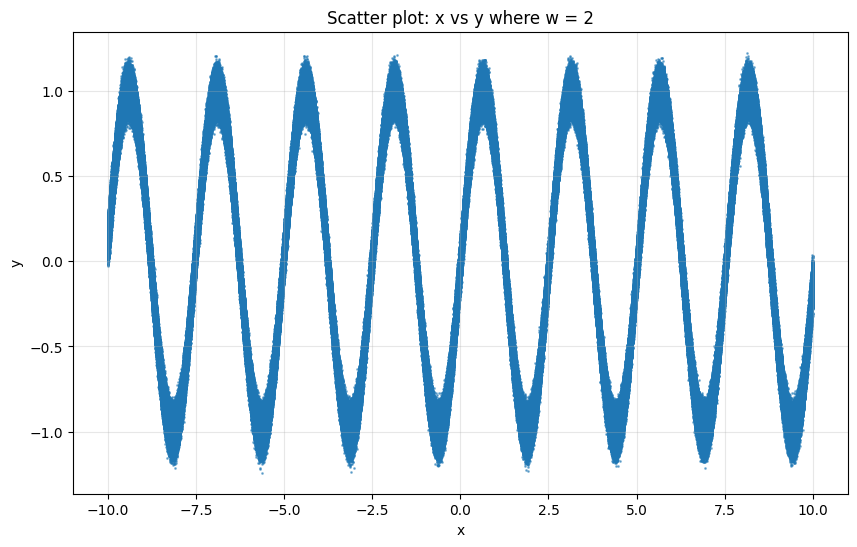

In [20]:
import matplotlib.pyplot as plt

df_w2_5 = df[df['w'] == 2.5]

plt.figure(figsize=(10, 6))
plt.scatter(df_w2_5['x'], df_w2_5['y'], alpha=0.5, s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot: x vs y where w = 2')
plt.grid(True, alpha=0.3)
plt.show()

In [65]:
df_w2_5[df_w2_5['y'].between(-0.1, 0.1)][df_w2_5['x'].between(1, 2)].head(20)

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/68422659.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w2_5[df_w2_5['y'].between(-0.1, 0.1)][df_w2_5['x'].between(1, 2)].head(20)


,w,x,y
90000280,2.5,1.269527,0.012358
90000302,2.5,1.279004,0.020199
90001317,2.5,1.260365,-0.056858
90001366,2.5,1.246833,0.097256
90001466,2.5,1.285007,-0.050217
90001500,2.5,1.272886,-0.033289
90001679,2.5,1.232812,0.072396
90001861,2.5,1.247809,0.014972
90001953,2.5,1.324535,-0.096469
90002282,2.5,1.257716,0.022834


In [66]:
df_w2_5[df_w2_5['y'].between(-0.1, 0.1)][df_w2_5['x'].between(1.2, 1.32)].mean()['x']

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/565620483.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w2_5[df_w2_5['y'].between(-0.1, 0.1)][df_w2_5['x'].between(1.2, 1.32)].mean()['x']


np.float64(1.2575194561395784)

In [67]:
df_w2_5[df_w2_5['y'].between(-0.1, 0.1)][df_w2_5['x'].between(2.2, 2.6)].head(20)

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/2213713015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w2_5[df_w2_5['y'].between(-0.1, 0.1)][df_w2_5['x'].between(2.2, 2.6)].head(20)


,w,x,y
90000621,2.5,2.492242,-0.076931
90001368,2.5,2.505245,0.044671
90002475,2.5,2.538171,0.069232
90003085,2.5,2.518587,0.009114
90003200,2.5,2.541885,0.024568
90003418,2.5,2.495697,0.001744
90003487,2.5,2.487171,-0.019430
90003534,2.5,2.544489,0.074314
90004140,2.5,2.458172,-0.031754
90004332,2.5,2.483737,-0.054896


In [68]:
df_w2_5[df_w2_5['y'].between(-0.1, 0.1)][df_w2_5['x'].between(2.4, 2.6)].mean()['x']

/var/folders/wd/pbrwgx494d94249zch69pcch0000gn/T/ipykernel_73465/682753051.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_w2_5[df_w2_5['y'].between(-0.1, 0.1)][df_w2_5['x'].between(2.4, 2.6)].mean()['x']


np.float64(2.5132702208747935)

In [70]:
(2.5132702208747935 - 1.2575194561395784 )* 2.5

3.1393769118380375

approx pi

as per the pattern, it is suggesting that y = sin(w * x) it seems.

In [22]:
x = df['x'].to_numpy()

In [23]:
w = df['w'].to_numpy()

In [24]:
y_act = df['y'].to_numpy()

In [34]:
y_pred = np.sin(w * x)

In [35]:
import numpy as np

In [ ]:
y_true = np.array(y_act)
y_pred = np.array(y_pred)

total = np.sum((y_act - np.mean(y_act))**2)
res = np.sum((y_act - y_pred) ** 2)

print(1 -(res / total))

    

0.9950523397226373


99.505 is the accuracy

In [73]:
x_test = df2['x'].to_numpy()
w_test = df2['w'].to_numpy()

In [74]:
y_test_pred = np.sin(w_test * x_test)
y_test_pred

array([ 0.97253051,  0.63193836, -0.96364649, ...,  0.31671769,
        0.04386668,  0.7379707 ], shape=(100000000,))

this is what i did. as i was not much handy with matplotlib. i. tried some of the implementation myself. some were given by claude